In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pickle
import os, sys
sys.path.append('..')
import json
from collections import defaultdict
from tasks import *

In [ ]:
merged_responses = {}
problem_num = 500
dataset_loc = '../dataset'
paths = ['0shot', '1shot','2shot','3shot','4shot']
paths = [f'../results/plot/cot/63_{path}' for path in paths]

all_files = {}

for path in paths:
    shot_num = path.split('_')[-1]
    files = os.listdir(path)
    all_files[shot_num] = files
    # all_files[difficulty]['path']=path
    
print(all_files['0shot'])
# print(all_files.items())
    
for shot_num, files in all_files.items():
    for f in files:
        if len(f.split('_')) < 2:
            continue
        llm, task = f.split('_')[0], f.split('_')[1]
        # if llm in ['gpt4','deepseek']:
        #     continue
        path = '../results/plot/cot/63_' + shot_num
        
        with open(f'{path}/{f}', 'r') as file:
            response_dict = json.load(file)
            
        for i in range(0, problem_num):
            if task not in merged_responses:
                merged_responses[task] = defaultdict(dict)
            
            if shot_num not in merged_responses[task]:
                merged_responses[task][shot_num] = defaultdict(dict)
            merged_responses[task][shot_num][i][llm] = response_dict[str(i)][llm]
            
task_list = list(merged_responses.keys())
print(task_list)

score = {}

from tasks import *

for task_name in task_list:
    task= globals()[task_name + '_Task'](dataset_loc)
    shot_level = ['0shot','1shot','2shot','3shot','4shot']
    score[task_name] = defaultdict(dict)
    for shot in shot_level:
        task.load_dataset('easy')
        score[task_name][shot] = defaultdict(dict)
        for i in range(0, problem_num):
            score[task_name][shot][i]['gt'] = task.problem_set[i]['exact_answer']
            for llm in merged_responses[task_name][shot][i].keys():
                if llm == 'problem':
                    continue
                r = merged_responses[task_name][shot][i][llm]
                score[task_name][shot][i][llm] = task.check_solution(i, r)


metrics = defaultdict(dict)
less_is_better = ['Distance']
results = []
for task in task_list:
    print(task)
    model_list = list(score[task]['0shot'][0].keys())
    model_list.remove('gt')
    for model in model_list:
        metrics[task][model] = {'feasibility-0shot':[], 'accuracy-0shot': [], 'feasibility-1shot':[], 'accuracy-1shot': [], 'feasibility-2shot':[], 'accuracy-2shot': [],'feasibility-3shot':[], 'accuracy-3shot': [], 'feasibility-4shot':[], 'accuracy-4shot': []}
        for i in range(0, problem_num):
            metrics[task][model]['feasibility-0shot'].append(score[task]['0shot'][i][model]>=0)
            metrics[task][model]['accuracy-0shot'].append(score[task]['0shot'][i][model]==score[task]['0shot'][i]['gt'])
            
            metrics[task][model]['feasibility-1shot'].append(score[task]['1shot'][i][model]>=0)
            metrics[task][model]['accuracy-1shot'].append(score[task]['1shot'][i][model]==score[task]['1shot'][i]['gt'])
            
            metrics[task][model]['feasibility-2shot'].append(score[task]['2shot'][i][model]>=0)
            metrics[task][model]['accuracy-2shot'].append(score[task]['2shot'][i][model]==score[task]['2shot'][i]['gt'])
            
            metrics[task][model]['feasibility-3shot'].append(score[task]['3shot'][i][model]>=0)
            metrics[task][model]['accuracy-3shot'].append(score[task]['3shot'][i][model]==score[task]['3shot'][i]['gt'])
            
            metrics[task][model]['feasibility-4shot'].append(score[task]['4shot'][i][model]>=0)
            metrics[task][model]['accuracy-4shot'].append(score[task]['4shot'][i][model]==score[task]['4shot'][i]['gt'])
        

        avg_feasible_0shot = sum(metrics[task][model]['feasibility-0shot']) / problem_num
        avg_acc_0shot = sum(metrics[task][model]['accuracy-0shot']) / problem_num

        avg_feasible_1shot = sum(metrics[task][model]['feasibility-1shot']) / problem_num
        avg_acc_1shot = sum(metrics[task][model]['accuracy-1shot']) / problem_num
        
        avg_feasible_2shot = sum(metrics[task][model]['feasibility-2shot']) / problem_num
        avg_acc_2shot = sum(metrics[task][model]['accuracy-2shot']) / problem_num
        
        avg_feasible_3shot = sum(metrics[task][model]['feasibility-3shot']) / problem_num
        avg_acc_3shot = sum(metrics[task][model]['accuracy-3shot']) / problem_num
        
        avg_feasible_4shot = sum(metrics[task][model]['feasibility-4shot']) / problem_num
        avg_acc_4shot = sum(metrics[task][model]['accuracy-4shot']) / problem_num
        
        

        results.append((task, model, avg_feasible_0shot,  avg_acc_0shot, avg_feasible_1shot, avg_acc_1shot, avg_feasible_2shot, avg_acc_2shot , avg_feasible_3shot, avg_acc_3shot, avg_feasible_4shot, avg_acc_4shot))
results = sorted(results, key=lambda x: x[1])

['gemma_Connected_easy_03_19-07.json', 'qwen_Diameter_easy_03_22-04.json', 'deepseek_Diameter_easy_03_21-16.json', 'mixtral_Diameter_easy_03_20-56.json', 'llama8b_Connected_easy_03_19-03.json', 'gpt4_Diameter_easy_04_00-42.json', 'llama8b_Diameter_easy_03_20-09.json', 'claude_Diameter_easy_03_20-02.json', 'gpt4_Connected_easy_05_10-54.json', 'qwen7b_Diameter_easy_03_21-58.json', 'qwen_Connected_easy_03_19-22.json', 'gpt4_Diameter_easy_05_01-04.json', 'gpt4_Connected_easy_05_00-57.json', 'qwen7b_Connected_easy_03_20-29.json', 'mixtral_Connected_easy_03_19-35.json', 'claude_Connected_easy_03_18-55.json', 'gemma_Diameter_easy_03_20-07.json', 'gpt_Connected_easy_03_18-59.json', 'gpt4_Connected_easy_03_20-07.json', 'llama_Diameter_easy_03_20-08.json', 'gpt_Diameter_easy_03_19-57.json', 'deepseek_Connected_easy_03_19-00.json', 'llama_Connected_easy_03_19-06.json', 'gpt4_Connected_easy_05_10-52.json', 'gpt4_Diameter_easy_05_11-12.json']


FileNotFoundError: [Errno 2] No such file or directory: 'results/plot/cot/63_0shot/gemma_Connected_easy_03_19-07.json'

['Deepseek-V2', 'GPT-4o', 'Llama3-8b', 'Mixtral-7x8b']


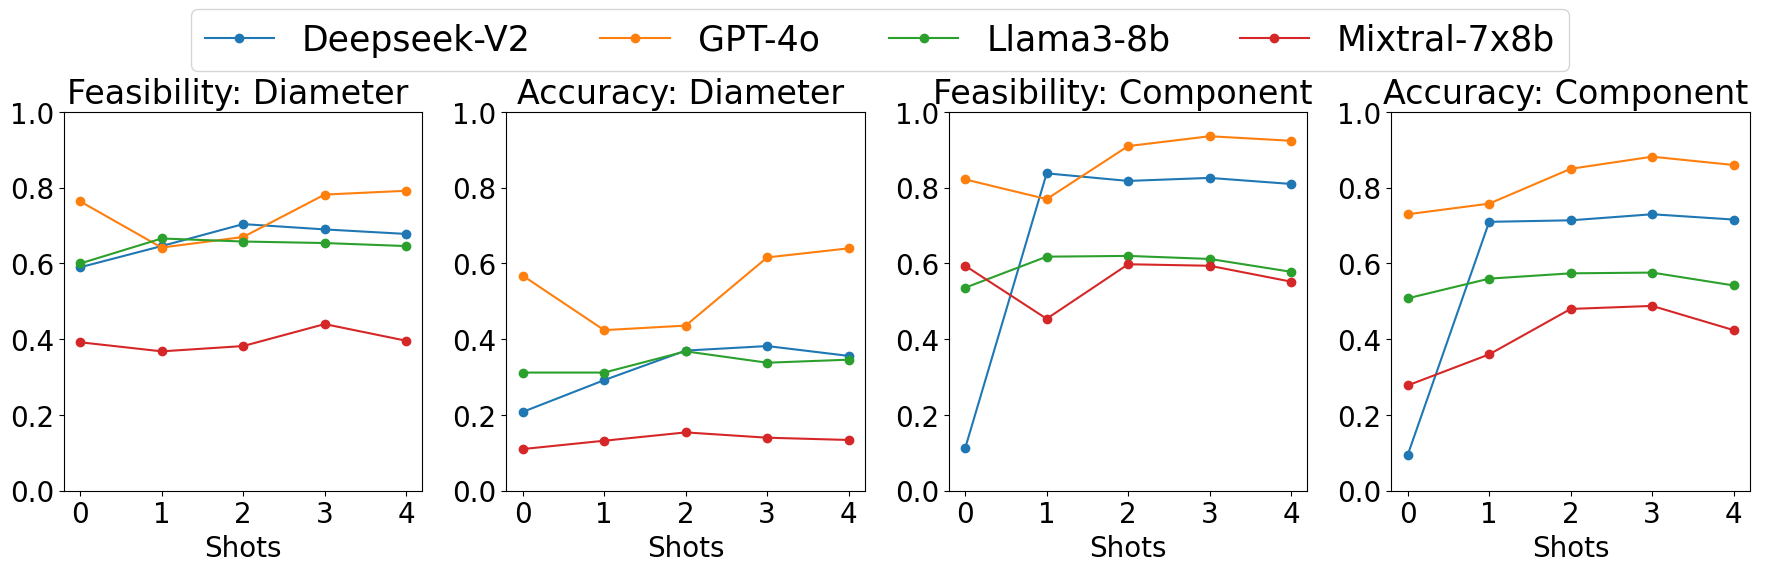

In [ ]:

plt.rcParams.update({'font.size': 20}) # 'font.family': 'Times New Roman'})
tasks = list(set([result[0] for result in results]))
models = list(set([result[1] for result in results]))

models = sorted(models)

def plot_task_performance(results, task, ax_feasibility, ax_accuracy):
    shots = [0, 1, 2, 3, 4]
    
    for model in models:
        model_list = 'gpt4,gpt4mini,claude,glm,llama,llama8b,deepseek,qwen72b,mixtral,gemma'.split(',')
        if model not in ['gpt4','deepseek','llama','mixtral'] or model not in model_list:
            continue
        task_results = [result for result in results if result[0] == task and result[1] == model]
        if task_results:
            task_result = task_results[0]
            feasible = task_result[2:11:2]
            acc = task_result[3:12:2]
            ax_feasibility.plot(shots, feasible, marker='o', label=model)
            ax_accuracy.plot(shots, acc, marker='o', label=model)
    
    task1 = task
    if task1 == 'Connected':
        task1 = 'Component'
        
    ax_feasibility.set_title(f'Feasibility: {task1} ')
    ax_feasibility.set_xlabel('Shots')
    #ax_feasibility.set_ylabel('Feasibility', fontsize=25, fontname='Times New Roman')
    ax_feasibility.set_xticks(shots)
    ax_feasibility.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax_feasibility.tick_params(axis='both', which='major', labelsize=20)
    
    ax_accuracy.set_title(f'Accuracy: {task1} ')
    ax_accuracy.set_xlabel('Shots')
    #ax_accuracy.set_ylabel('Accuracy', fontsize=25, fontname='Times New Roman')
    ax_accuracy.set_xticks(shots)
    ax_accuracy.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    ax_accuracy.tick_params(axis='both', which='major', labelsize=20)

fig, axs = plt.subplots(1, len(tasks)*2, figsize=(18, 6))

for i, task in enumerate(tasks):
    plot_task_performance(results, task, axs[i*2], axs[i*2+1])

plt.tight_layout()

handles, labels = axs[0].get_legend_handles_labels()
for i in range(len(labels)):
    if labels[i] == 'llama':
        labels[i] = 'Llama3-8b'
    elif labels[i] == 'claude':
        labels[i] = 'Claude-3.5-sonnet'
    elif labels[i] == 'deepseek':
        labels[i] = 'Deepseek-V2'
    elif labels[i] == 'qwen72b':
        labels[i] = 'Qwen2.5-72b'
    elif labels[i] == 'gpt4':
        labels[i] = 'GPT-4o'
    elif labels[i] == 'mixtral':
        labels[i] = 'Mixtral-7x8b'
print(labels)
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=len(labels), fontsize=25)

plt.subplots_adjust(top=0.8)
# plt.savefig('cot_evaluation_new.pdf', format='pdf', dpi=1200, bbox_inches='tight')  # 增加清晰度

plt.show()


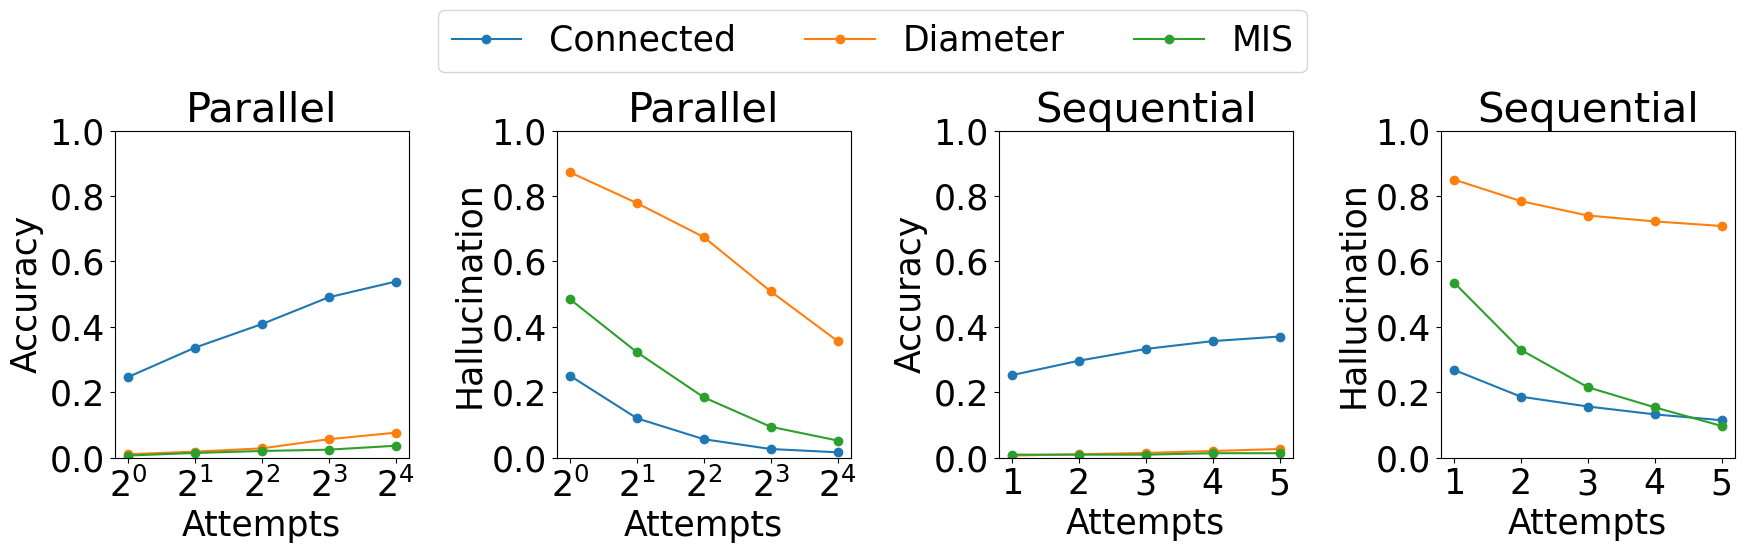

In [ ]:
# Set global font properties
plt.rcParams.update({'font.size': 25}) # 'font.family': 'serif', 'font.serif': ['Times New Roman']})

# Data for the first set of plots
attempts1 = [2**i for i in range(5)]
tasks = ['Connected', 'Diameter', 'MIS']
accuracies1 = [
    [0.246, 0.336, 0.408, 0.49, 0.538],
    [0.01, 0.018, 0.028, 0.056, 0.076],
    [0.006, 0.014, 0.02, 0.024, 0.036]
]
hallucinations1 = [
    [0.25, 0.12, 0.056, 0.026, 0.016],
    [0.872, 0.778, 0.674, 0.508, 0.356],
    [0.484, 0.322, 0.184, 0.094, 0.052]
]

# Data for the second set of plots
attempts2 = [1, 2, 3, 4, 5]
new_accuracies = [
    [0.252, 0.296, 0.332, 0.356, 0.37],
    [0.006, 0.01, 0.014, 0.02, 0.026],
    [0.00877193, 0.00877193, 0.00877193, 0.01315789, 0.01315789]
]
new_hallucinations = [
    [0.268, 0.186, 0.156, 0.132, 0.114],
    [0.85, 0.784, 0.74, 0.722, 0.708],
    [0.53508772, 0.32894737, 0.21491228, 0.15350877, 0.09649123]
]

fig, axs = plt.subplots(1, 4, figsize=(18, 6))
# Configure y-axis
y_ticks = np.arange(0, 1.1, 0.2)

# Plot the first set of accuracies
for i, task in enumerate(tasks):
    axs[0].plot(attempts1, accuracies1[i], marker='o', label=task)
axs[0].set_title('Parallel')
axs[0].set_xlabel('Attempts')
axs[0].set_xscale('log', base=2)
axs[0].set_xticks(attempts1)
axs[0].set_ylim(0, 1)
axs[0].set_yticks(y_ticks)
axs[0].set_ylabel('Accuracy')

# Plot the first set of hallucinations
for i, task in enumerate(tasks):
    axs[1].plot(attempts1, hallucinations1[i], marker='o', label=task)
axs[1].set_title('Parallel')
axs[1].set_xlabel('Attempts')
axs[1].set_xscale('log', base=2)
axs[1].set_xticks(attempts1)
axs[1].set_ylim(0, 1)
axs[1].set_yticks(y_ticks)
axs[1].set_ylabel('Hallucination')

# Plot the second set of accuracies
for i, task in enumerate(tasks):
    axs[2].plot(attempts2, new_accuracies[i], marker='o', label=task)
axs[2].set_title('Sequential')
axs[2].set_xlabel('Attempts')
axs[2].set_xticks(attempts2)
axs[2].set_ylim(0, 1)
axs[2].set_yticks(y_ticks)
axs[2].set_ylabel('Accuracy')

# Plot the second set of hallucinations
for i, task in enumerate(tasks):
    axs[3].plot(attempts2, new_hallucinations[i], marker='o', label=task)
axs[3].set_title('Sequential')
axs[3].set_xlabel('Attempts')
axs[3].set_xticks(attempts2)
axs[3].set_ylim(0, 1)
axs[3].set_yticks(y_ticks)
axs[3].set_ylabel('Hallucination')

plt.tight_layout()

# Shared legend
handles, labels = axs[0].get_legend_handles_labels()
labels = ['Connected', 'Diameter', 'MIS']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=len(labels), fontsize=25)

plt.subplots_adjust(top=0.75)

# plt.savefig('para_and_seq.pdf', bbox_inches='tight')
plt.show()

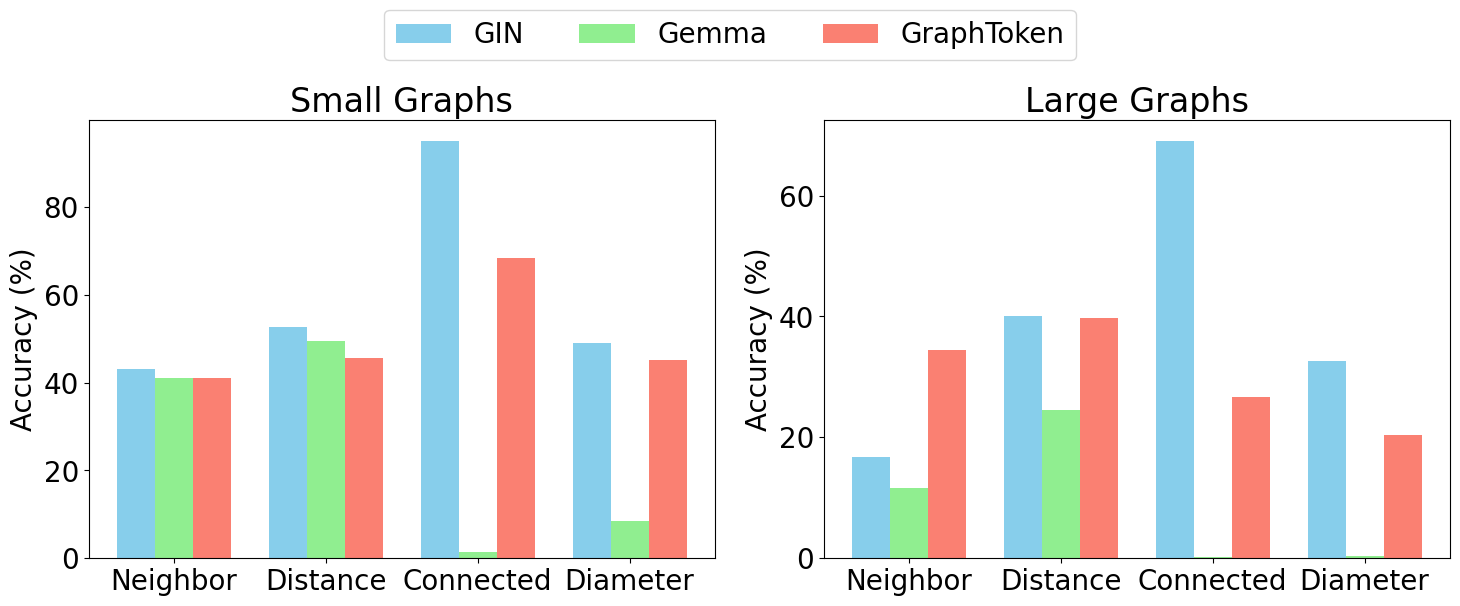

In [3]:
# Data
models = ['GIN', 'Gemma', 'GraphToken']
tasks = ['Neighbor', 'Distance', 'Connected', 'Diameter']
small_graphs = [
    [43.0, 52.6, 95.0, 49.0],
    [41.0, 49.6, 1.4, 8.6],
    [41.0, 45.6, 68.4, 45.2]
]
large_graphs = [
    [16.8, 40.0, 69.0, 32.6],
    [11.6, 24.6, 0.2, 0.4],
    [34.4, 39.8, 26.6, 20.4]
]

# Set font properties
plt.rcParams.update({'font.size': 20}) #, 'font.family': 'serif', 'font.serif': ['Times New Roman']})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
bar_width = 0.25
r1 = np.arange(len(tasks))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create bars for small graphs
ax1.bar(r1, small_graphs[0], color='skyblue', width=bar_width, label='GIN')
ax1.bar(r2, small_graphs[1], color='lightgreen', width=bar_width, label='Gemma')
ax1.bar(r3, small_graphs[2], color='salmon', width=bar_width, label='GraphToken')

# Create bars for large graphs
ax2.bar(r1, large_graphs[0], color='skyblue', width=bar_width, label='GIN')
ax2.bar(r2, large_graphs[1], color='lightgreen', width=bar_width, label='Gemma')
ax2.bar(r3, large_graphs[2], color='salmon', width=bar_width, label='GraphToken')

# Customize the plots
for ax in (ax1, ax2):
    ax.set_ylabel('Accuracy (%)')
    ax.set_xticks([r + bar_width for r in range(len(tasks))])
    ax.set_xticklabels(tasks)

# Get handles and labels for the legend
handles, labels = ax1.get_legend_handles_labels()

# Add a single legend above the plots
fig.legend(handles, labels, loc='upper center', ncol=len(models), bbox_to_anchor=(0.5, 1.05))

ax1.set_title('Small Graphs')
ax2.set_title('Large Graphs')

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()